In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("Resources/lending_data.csv")
lending_data = pd.read_csv(file_path)

# Review the DataFrame
lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data['loan_status']

# Separate the X variable, the features
X = lending_data.drop(columns=['loan_status'])

In [5]:
# Review the y variable Series
print("Shape of y (labels):", y.shape)

Shape of y (labels): (77536,)


In [6]:
# Review the X variable DataFrame
print("Shape of X (features):", X.shape)

Shape of X (features): (77536, 7)


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [9]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_model = LogisticRegression(random_state=1)


# Fit the model using training data
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [10]:
# Make a prediction using the testing data
predictions = logistic_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [12]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
conf_matrix

Confusion Matrix:


array([[14926,    75],
       [   46,   461]], dtype=int64)

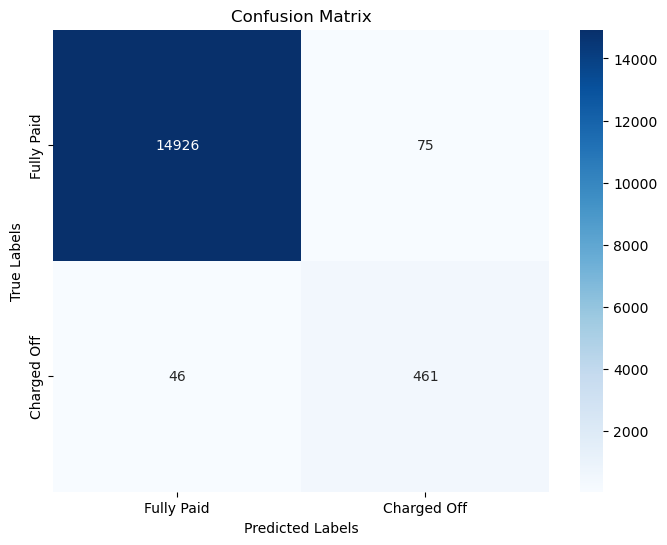

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fully Paid', 'Charged Off'], 
            yticklabels=['Fully Paid', 'Charged Off'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Print the classification report for the model
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15001
           1       0.86      0.91      0.88       507

    accuracy                           0.99     15508
   macro avg       0.93      0.95      0.94     15508
weighted avg       0.99      0.99      0.99     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model's performance in predicting healthy (label "0") and high-risk (label "1") loans can be judged by looking at how well it identifies each category. For healthy loans, we're interested in how many it correctly identifies, while for high-risk loans, we want to know if it catches them accurately. Looking at the classification report, we can see how good it is at this task using metrics like precision, recall, and F1-score. The confusion matrix breaks down its predictions further, showing where it gets things right (true positives and true negatives) and where it misses the mark (false positives and false negatives). By checking out these metrics and the confusion matrix together, we can get a good idea of how reliable the model is at spotting both healthy and high-risk loans.

---